Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: plt.contour for contour plots, plt.contourf for filled contour plots, and plt.imshow for showing images.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [3]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

np.meshgrid(x, y), Turkish explanation:
https://www.web-gelistirme-sc.com/tr/python/pythonnumpyde-meshgrid-amaci-nedir/823805479/
np.meshgrid(x, y) is a function that creates a meshgrid.
English explanation:
https://www.geeksforgeeks.org/numpy-meshgrid-function/

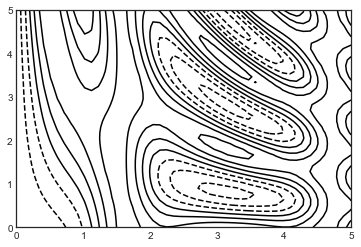

In [16]:
plt.contour(X, Y, Z, colors='black')

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the cmap argument.

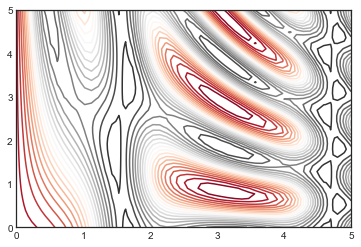

In [17]:
plt.contour(X, Y, Z,20, cmap='RdGy')

20 is the number of contour lines in the available ranges. cmpar='RdGy' is the name of the colormap.
For more colormaps see: plt.cm.<TAB>

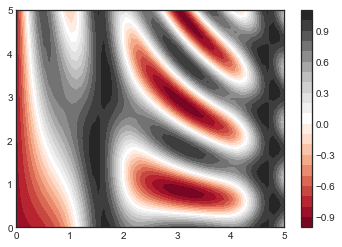

In [18]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

The colorbar makes it clear that the grey regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.


(0.0, 5.0, 0.0, 5.0)

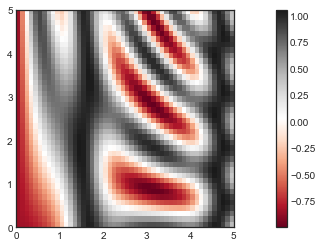

In [26]:
plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()], cmap='RdGy', origin='lower');
#plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy')
plt.colorbar()
plt.axis('image')

plt.imshow() doesn't accept an x and y grid, so you must manually specify the extent [xmin, xmax, ymin, ymax] of the image on the plot.
plt.imshow() by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
plt.imshow() will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting,
such as : plt.axis('equal'), plt.axis('scaled') and many more

Finally, it can sometimes be useful to combine contour plots and image plots. For example, here we'll use a partially transparent background image (with transparency set via the alpha parameter) and overplot contours with labels on the contours themselves (using the plt.clabel() function):

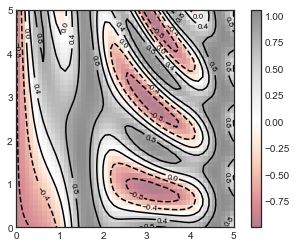

In [31]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy', alpha=0.5)
plt.colorbar()

Three dimensional data representation in matplotlib: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html